# Daisyworld: Some visualisations

In [39]:
# Imports:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from numbers import Number
from functools import partial


The (simplified) *daisyworld* model is given by the system of ODEs
$$\dot{B} = -T + 1/2 - B$$
$$\dot{W} = T + 1/2 + W$$
$$\dot{T} = k - 1/2 + B/2 - W/2$$
Where $B$ and $W$ denote the relative population of black and white daisies respectively,
and $T$ is the temperature of the planet

In [35]:
# Define this as a function. Note function signature determined by scipy
def system(t, y, k):
    # Want to allow k to be a constant or a function
    if not callable(k):
        k0 = float(k)
        k = lambda t: k0
        
    B, W, T = y
    B_dot = - T + 0.5 - B if B > 0 else 0
    W_dot = T + 0.5 - W if W > 0 else 0
    T_dot = k(t) - 0.5 + 0.5 * B - 0.5 * W
    return (B_dot, W_dot, T_dot)

In [45]:
# ODE solver
def plot_solution(time = 15,
                  B0 = None,
                  W0 = 0.75,
                  T0 = 0.125,
                  k = 0.5):
    # If we give just W0, and set B0=None, then assume we want B0 = 1-W0
    B0 = B0 if B0 is not None else 1 - W0
    
    # Solve IVP
    solution = integrate.solve_ivp(partial(system, k=k),
                                   t_span=(0, time),
                                   y0=(B0, W0, T0),
                                   dense_output=True,
                                   max_step=0.2, # Reduce if t_span is very wide
                                  )

    # Plot result
    plt.cla()
    plt.plot(solution.t, solution.y[:-1,].T, label=("B", "W"))
    ax1 = plt.gca()
    ax1.set_ylim([0, 1])
    ax2 = ax1.twinx()
    ax2.plot(solution.t, solution.y[2,] / max(solution.y[2,]), "g--", label="T")
    plt.figlegend(["B", "W", "T"], bbox_to_anchor=(0.825, 0.825))
    return plt.gcf()

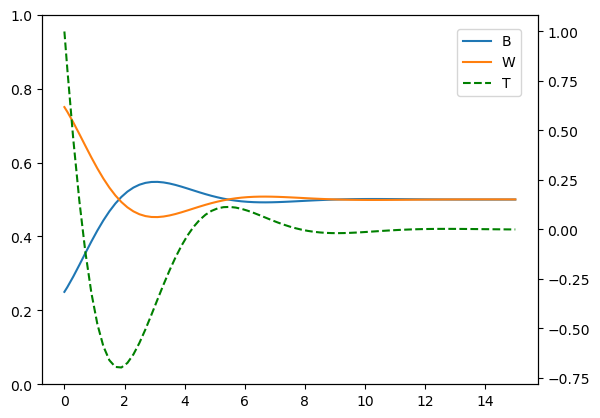

In [47]:
# Using the default values:
plot_solution();

In [48]:
# Helper function that ma
def interpolate(start_val, stop_val, start_time, stop_time):
    def interpolated_func(t):
        if t < start_time:
            return start_val
        if start_time <= t < stop_time:
            return start_val + (stop_val - start_val) * (t - start_time) / (stop_time - start_time)
        return stop_val
    return interpolated_func

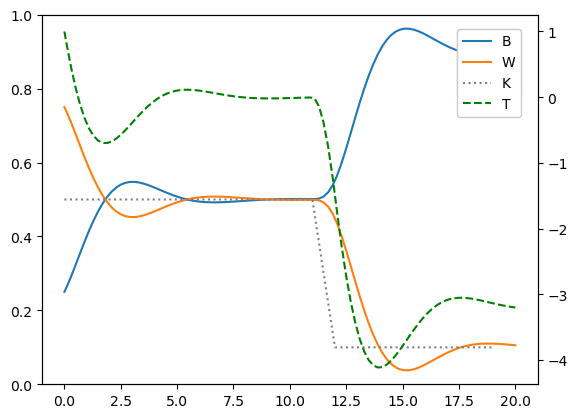

In [51]:
k = interpolate(0.5, 0.1, 11, 12) # Replace with any function of time you like!


fig = plot_solution(time = 20, k=k)
ax1 = fig.get_axes()[0]
ax1.plot(range(20), list(map(k, range(20))), color="grey", linestyle="dotted", label="K")
plt.figlegend(["B", "W", "K", "T"], bbox_to_anchor=(0.825, 0.825), framealpha=1);